In [1]:
%load_ext autoreload
%autoreload 2

import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np

img = nib.load("./IBD/CAHI01.nii.gz")

In [2]:
img_data = img.get_fdata()
img_data.shape

(192, 256, 256)

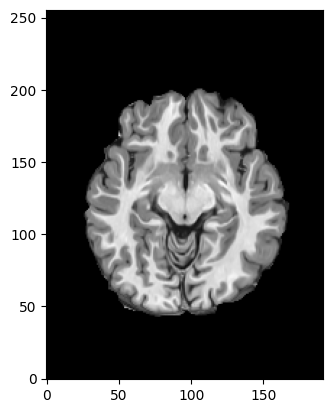

In [3]:
plt.imshow(img_data[:,:,150].T, cmap="gray", origin="lower")

14.0


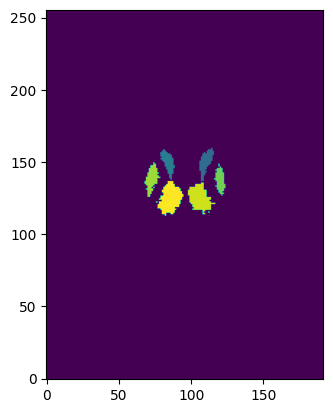

In [4]:
seg = nib.load("./IBD/CAHI01M.ch.nii.gz")
seg_data = seg.get_fdata()
seg_data.shape
print(seg_data[:,:,170].max())
plt.imshow(seg_data[:,:,170].T, origin="lower")

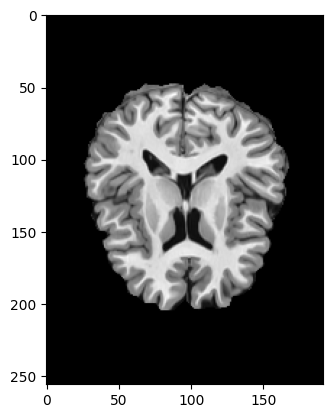

In [5]:
idx = 170
img_plane = img_data[:,:,idx]
seg_plane = seg_data[:,:,idx]

img_plane = img_plane / np.max(img_plane)
plt.imshow(img_plane.T, cmap="gray")

In [6]:
from utils.visualize import visualize_segmentation
import ipywidgets as widgets
import time

@widgets.interact(x=(100, 200))
def f(idx=170):
    overlay = visualize_segmentation(img_data, seg_data, idx)
    plt.imshow(np.swapaxes(overlay, 0, 1))
    plt.axis("off");

interactive(children=(IntSlider(value=170, description='idx', max=510, min=-170), Output()), _dom_classes=('wi…